# predict the age of abalone
score : RMSLE (Root Mean Squared Logarithmic Error)

In [285]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)
data = pd.concat([train,test],axis=0,ignore_index=True)
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,151026,3,I,55334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,151026.0,NaN,NaN,NaN,0.51723,0.117974,0.075,0.445,0.545,0.6,0.815
Diameter,151026.0,NaN,NaN,NaN,0.401792,0.097804,0.055,0.345,0.425,0.47,0.65
Height,151026.0,NaN,NaN,NaN,0.135579,0.038075,0.0,0.11,0.14,0.16,1.13
Whole weight,151026.0,NaN,NaN,NaN,0.789446,0.457637,0.002,0.4195,0.7995,1.068,2.8255
Whole weight.1,151026.0,NaN,NaN,NaN,0.340958,0.204345,0.001,0.1775,0.3295,0.4635,1.488
Whole weight.2,151026.0,NaN,NaN,NaN,0.169421,0.100833,0.0005,0.0865,0.166,0.2325,0.76
Shell weight,151026.0,NaN,NaN,NaN,0.225989,0.130052,0.0015,0.12,0.225,0.305,1.005
Rings,90615.0,NaN,NaN,NaN,9.696794,3.176221,1.0,8.0,9.0,11.0,29.0


In [286]:
train['Rings'].isnull().sum()

0

In [287]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [288]:
train.tail()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
90614,I,0.425,0.325,0.100,0.3455,0.1525,0.0785,0.1050,8


In [289]:
test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [290]:
test.tail()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350
151025,F,0.430,0.340,0.120,0.4150,0.1525,0.0910,0.0905


In [291]:
data.sample()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
124129,F,0.545,0.4,0.155,0.7305,0.302,0.169,0.18,NaN


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151026 entries, 0 to 151025
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sex             151026 non-null  object 
 1   Length          151026 non-null  float64
 2   Diameter        151026 non-null  float64
 3   Height          151026 non-null  float64
 4   Whole weight    151026 non-null  float64
 5   Whole weight.1  151026 non-null  float64
 6   Whole weight.2  151026 non-null  float64
 7   Shell weight    151026 non-null  float64
 8   Rings           90615 non-null   float64
dtypes: float64(8), object(1)
memory usage: 10.4+ MB


In [293]:
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Whole_weight_1',
       'Whole_weight_2', 'Shell_weight', 'Rings']

In [294]:
# Ordinary Least Squares model
import statsmodels.formula.api as smf
ols = smf.ols(formula="Rings ~ Length + Diameter + Height + Whole_weight + Whole_weight_1 + Whole_weight_2 + Shell_weight", data=data)


In [295]:
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 1.936e+04
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:01:11   Log-Likelihood:            -1.9186e+05
No. Observations:               90615   AIC:                         3.837e+05
Df Residuals:                   90607   BIC:                         3.838e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8305      0.054     52.452      0.000       2.725       2.936
Length            -2.5178      0.404     -6.230      0.000      -3.310      -1.726
Diameter           9.7548      0.500     19.510      0.000       8.775      10.735
Height            22.3752      0.490     45.654      0.000      21.415      23.336
Whole_weight       3.8581      0.121     31.776      0.000       3.620       4.096
Whole_weight_1   -16.1017      0.151   -106.586      0.000     -16.398     -15.806
Whole_weight_2    -6.3251      0.296    -21.385      0.000      -6.905      -5.745
Shell_weight      20.9543      0.220     95.422      0.000      20.524      21.385
==============================================================================
Omnibus:                    29970.153   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196275.097
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                       9.614   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Length', ylabel='Diameter'>

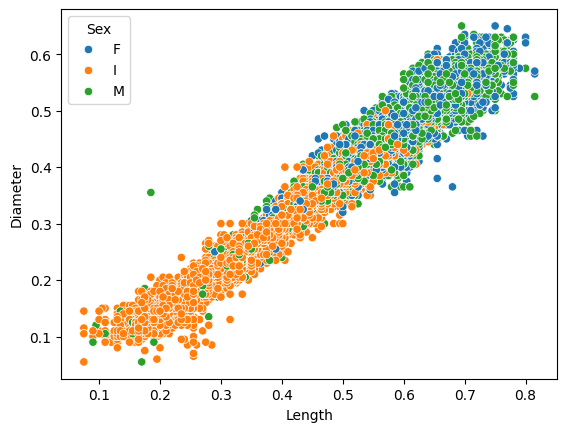

In [296]:
sns.scatterplot(x="Length",y="Diameter",data=data,hue="Sex")

In [297]:
dtype = data.dtypes
dtype = pd.DataFrame(dtype)
dtype


,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole_weight,float64
Whole_weight_1,float64
Whole_weight_2,float64
Shell_weight,float64
Rings,float64


<Axes: xlabel='Whole_weight', ylabel='Density'>

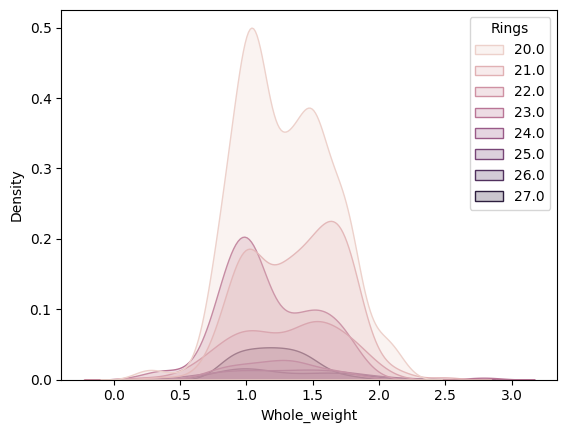

In [298]:
sns.kdeplot(data=data[data['Rings'].isin(range(20, 29))], x='Whole_weight', hue="Rings", fill=True)

<Axes: xlabel='Length', ylabel='Rings'>

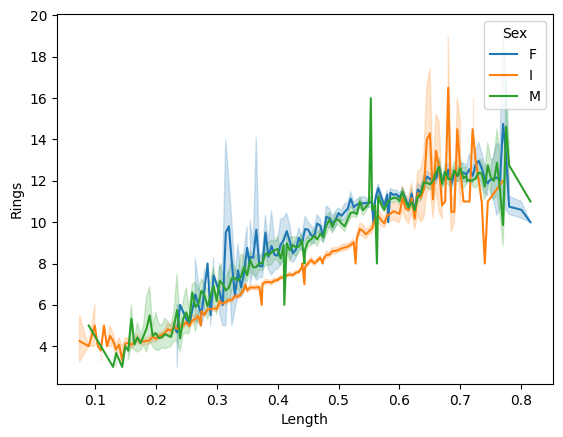

In [299]:
sns.lineplot(x="Length",y="Rings",data=data,hue="Sex",ci=95)

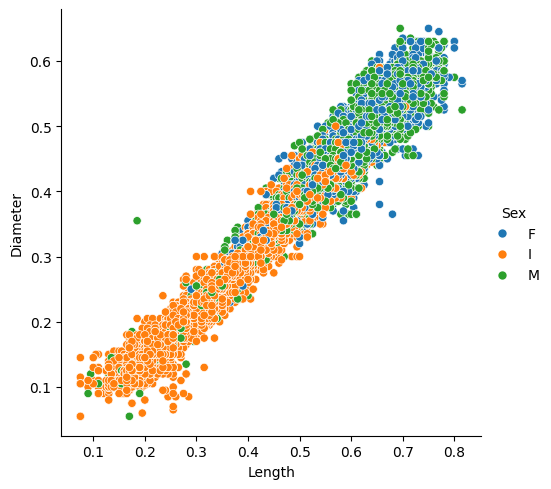

In [300]:
sns.relplot(hue = "Sex",x="Length",y="Diameter", data=data)

<Axes: xlabel='Sex', ylabel='Count'>

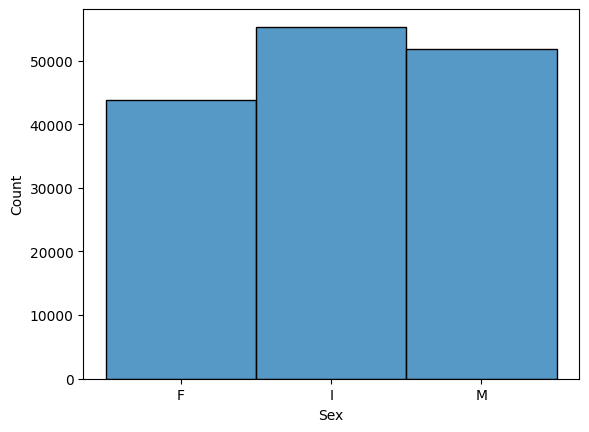

In [301]:
sns.histplot(data['Sex'])

In [302]:
sex_df = pd.get_dummies(data["Sex"], prefix="Sex",dtype=int)
data = pd.concat([data,sex_df],axis=1)
data.drop("Sex",axis=1,inplace=True)


In [303]:
data.sample()

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
41535,0.5,0.41,0.145,0.7045,0.3165,0.146,0.21,16.0,1,0,0


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151026 entries, 0 to 151025
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Length          151026 non-null  float64
 1   Diameter        151026 non-null  float64
 2   Height          151026 non-null  float64
 3   Whole_weight    151026 non-null  float64
 4   Whole_weight_1  151026 non-null  float64
 5   Whole_weight_2  151026 non-null  float64
 6   Shell_weight    151026 non-null  float64
 7   Rings           90615 non-null   float64
 8   Sex_F           151026 non-null  int32  
 9   Sex_I           151026 non-null  int32  
 10  Sex_M           151026 non-null  int32  
dtypes: float64(8), int32(3)
memory usage: 10.9 MB


<Axes: >

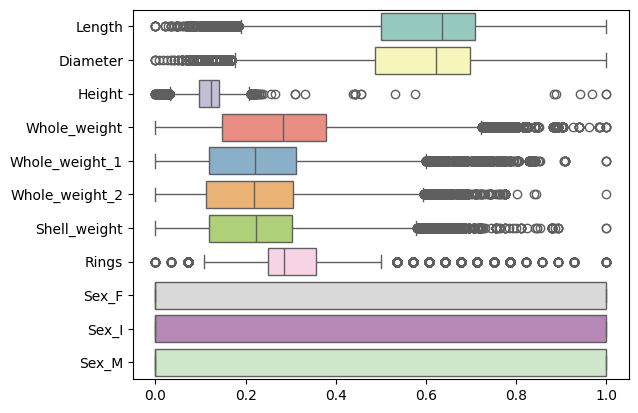

In [305]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_norm,columns = data.columns)
sns.boxplot(data=data_norm, orient="h", palette="Set3")

<Axes: xlabel='Length', ylabel='Diameter'>

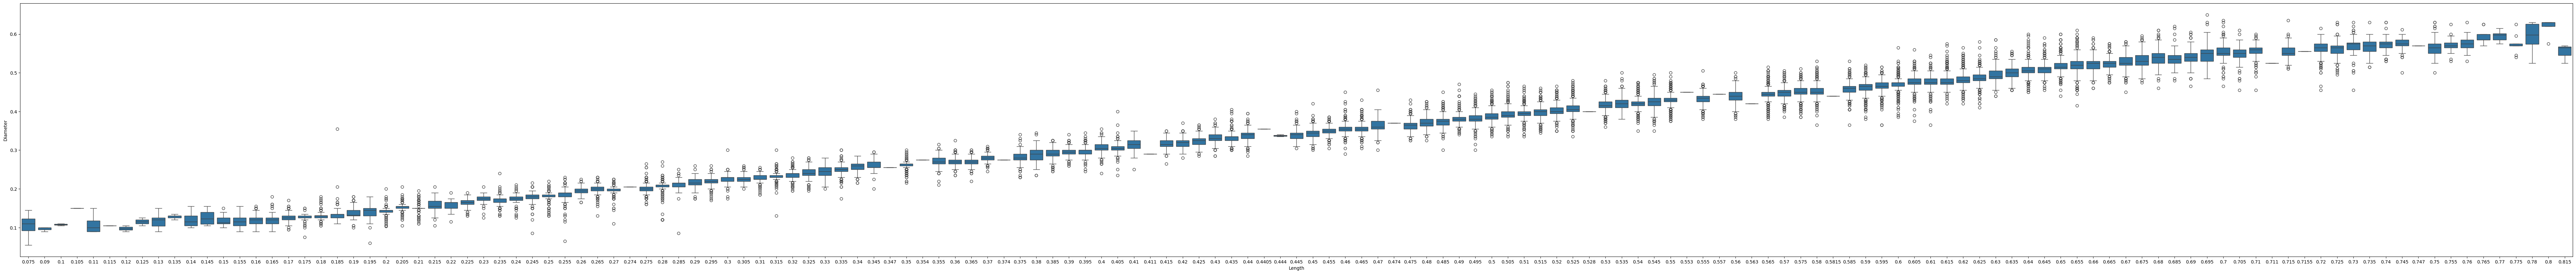

In [306]:
plt.figure(figsize=(100, 10))
sns.boxplot(x="Length",y="Diameter",data=data[data['Rings'].notnull()])

In [307]:
# data.drop(data[(data['Rings'].notnull()) & (data['Diameter'] > 0.3)& (data['Length'] < 0.2)].index, inplace=True)
# data.drop(data[(data['Rings'].notnull())&(data['Height']>0.3)].index, inplace=True) 
# data.drop(data[(data['Rings'].notnull())&(data['Whole_weight_2']>0.7)].index, inplace=True)
# data.drop(data[(data['Rings'].notnull())&(data['Whole_weight_1']>1.4)].index, inplace=True) 
# data.drop(data[(data['Rings'].notnull())&(data['Shell_weight']>0.9)].index, inplace=True)
# data.drop(data[(data['Rings'].notnull())&(data['Shell_weight']>0.3)&(data['Length']<0.35)].index, inplace=True) 

<Axes: xlabel='Length', ylabel='Whole_weight_1'>

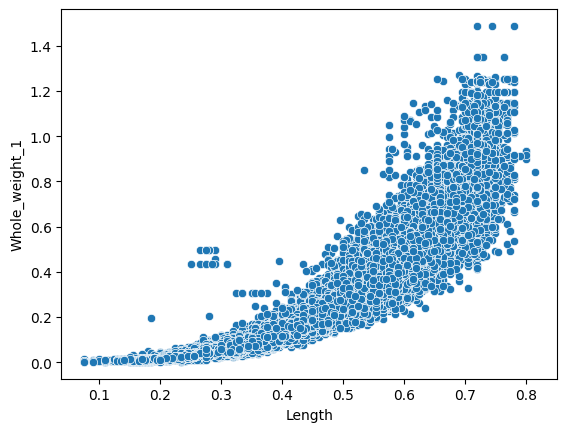

In [308]:
sns.scatterplot(x='Length',y='Whole_weight_1',data=data)

Shows a very heteroscedasticity 

In [309]:
data[data['Whole_weight_1']>1]

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
1607,0.745,0.600,0.215,2.5085,1.2320,0.5190,0.7000,11.0,0,0,1
1778,0.725,0.565,0.185,2.0370,1.0135,0.4210,0.4530,9.0,1,0,0
2058,0.735,0.570,0.220,2.3020,1.0090,0.4030,0.6205,12.0,0,0,1
2335,0.745,0.570,0.215,2.2500,1.1455,0.4460,0.5580,12.0,0,0,1
2673,0.730,0.520,0.200,2.0170,1.0130,0.3525,0.3700,14.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
150041,0.720,0.565,0.190,2.0870,1.0815,0.4655,0.5030,NaN,0,0,1
150136,0.750,0.615,0.205,2.3235,1.2635,0.4985,0.5285,NaN,0,0,1
150333,0.745,0.585,0.215,2.2305,1.2395,0.4130,0.5630,NaN,0,0,1
150453,0.755,0.580,0.200,2.0730,1.0135,0.4655,0.5315,NaN,1,0,0


In [310]:
data.shape

(151026, 11)

In [311]:
data[data['Height'] == 0]

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
7025,0.315,0.230,0.0,0.1340,0.0545,0.0245,0.3505,8.0,0,1,0
14208,0.430,0.340,0.0,0.3440,0.1880,0.0705,0.1050,8.0,0,1,0
32078,0.470,0.355,0.0,0.5785,0.2965,0.1550,0.1360,7.0,0,0,1
52324,0.315,0.230,0.0,0.1340,0.0530,0.0375,0.3505,7.0,0,1,0
70295,0.430,0.340,0.0,0.4060,0.2035,0.0960,0.1230,7.0,0,1,0
90295,0.430,0.325,0.0,0.3335,0.1350,0.0585,0.1050,10.0,0,0,1
124682,0.560,0.445,0.0,0.8725,0.3050,0.1900,0.3050,NaN,0,0,1
132619,0.270,0.195,0.0,0.0840,0.0250,0.0490,0.0310,NaN,0,1,0


In [312]:
# for diameter in data[data['Height'] == 0]['Diameter'].values:
#     height_mean = data[data['Diameter'] == diameter]['Height'].mean()
#     data.loc[data['Height'] == 0, 'Height'] = height_mean

In [313]:
mean_shell_weight = data[(data['Rings'].notnull()) & (data['Length'] > 0.25) & (data['Length'] < 0.35)]['Shell_weight'].mean()
data.loc[(data['Shell_weight'] > 0.3) & (data['Length'] < 0.35), 'Shell_weight'] = mean_shell_weight

In [314]:
data[(data['Rings'].notnull())&(data['Length']>0.25)&(data['Length']<0.35)]['Shell_weight'].mean()

0.040049541744462895

In [315]:
# data.drop(data[data['Rings']<=2].index,inplace=True)

In [316]:
import pandas as pd

# Filter 'data' DataFrame based on 'Shell_weight' greater than 0.9
filtered_data = data[data['Shell_weight'] > 0.9].copy()

# Convert 'Length' column to float
filtered_data['Length'] = filtered_data['Length'].astype(float)

# Calculate upper and lower bounds for 'Length' based on 10% deviation from mean length
mean_length = filtered_data['Length'].mean()
upper_bound = mean_length * 1.01
lower_bound = mean_length * 0.99

# Filter rows where 'Length' is within the calculated bounds
mean_shell_weight = data[(data['Length'] > lower_bound) & (data['Length'] < upper_bound)]['Shell_weight'].mean()


In [317]:
data.loc[(data['Shell_weight'] > 0.9),'Shell_weight'] = mean_shell_weight

In [318]:
for length in data[data['Height'] > 0.34]['Length'].values:
    mean_height = data[ (data['Length'] == length)]['Height'].mean()
    data.loc[(data['Length'] == length), 'Height'] = mean_height

In [319]:
# fig, ax = plt.subplots(figsize=(40,40))
# sns.pairplot(data)

<Axes: xlabel='Shell_weight', ylabel='Rings'>

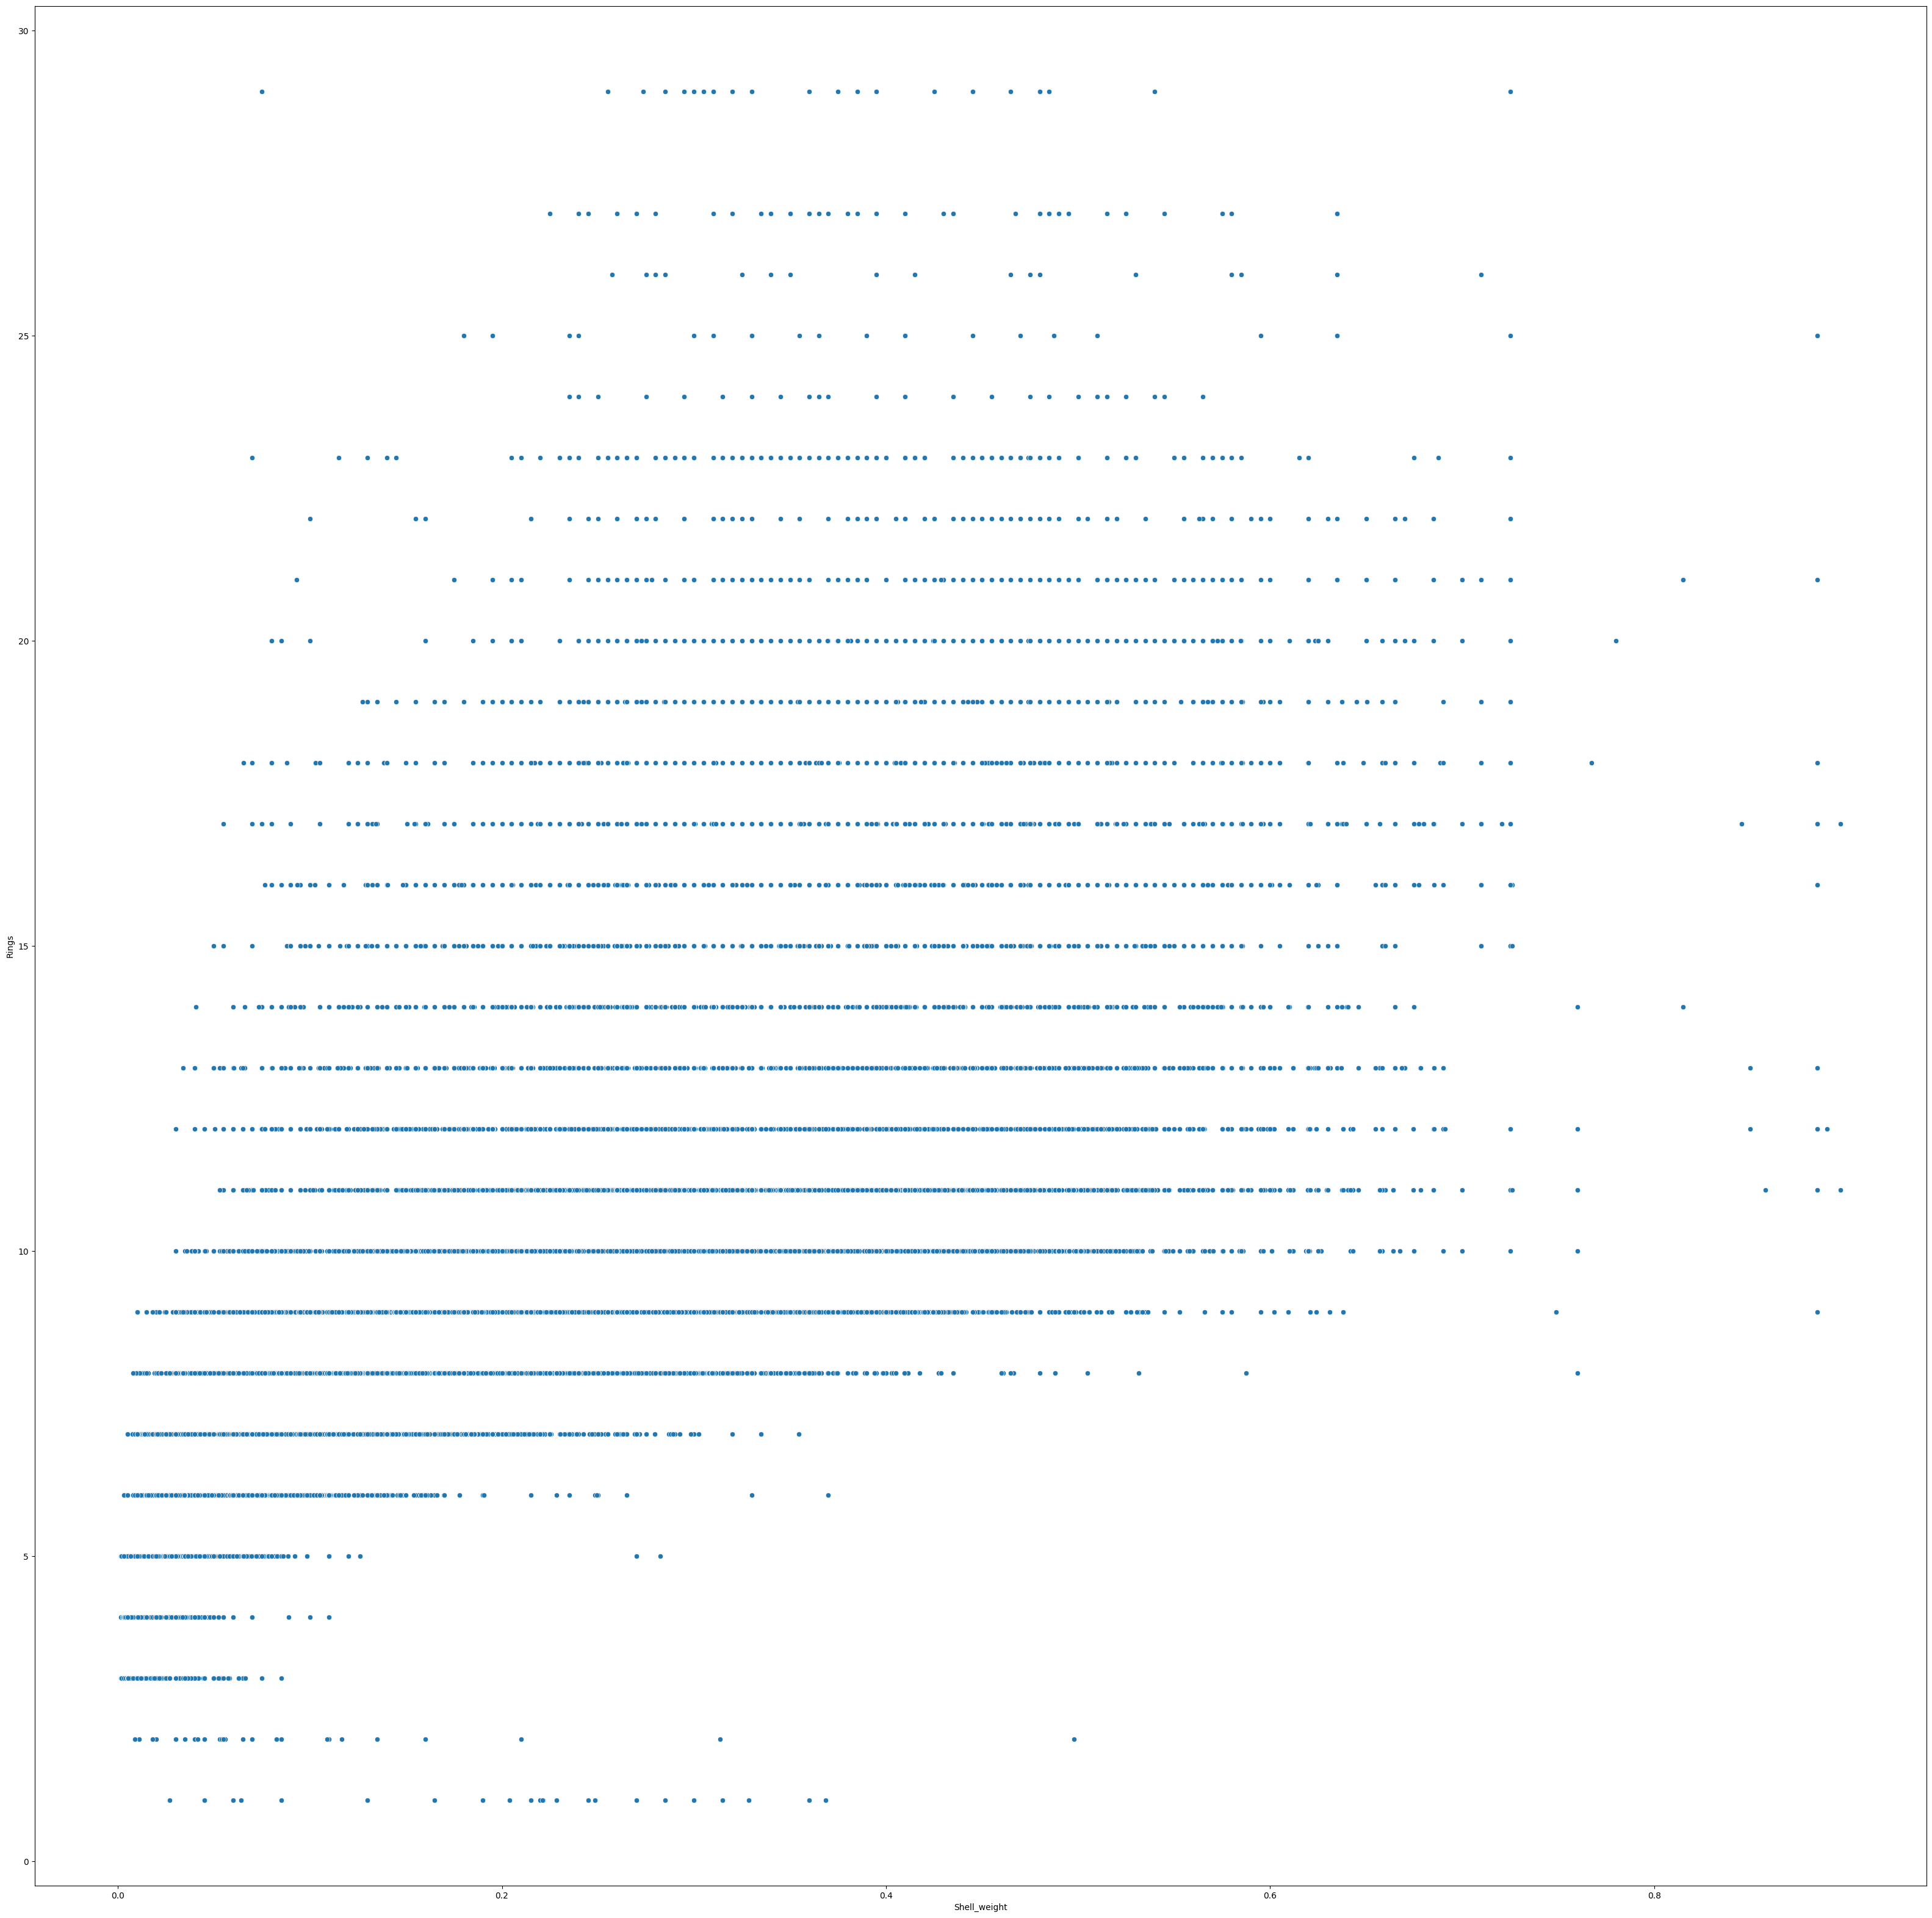

In [320]:
fig, ax = plt.subplots(figsize=(40,40))
sns.scatterplot(x="Shell_weight",y="Rings",data=data)

In [321]:
df = data.corr()
df.sort_values("Rings",ascending=False,inplace=True)
df.index

Index(['Rings', 'Shell_weight', 'Height', 'Diameter', 'Length', 'Whole_weight',
       'Whole_weight_2', 'Whole_weight_1', 'Sex_F', 'Sex_M', 'Sex_I'],
      dtype='object')

<Axes: >

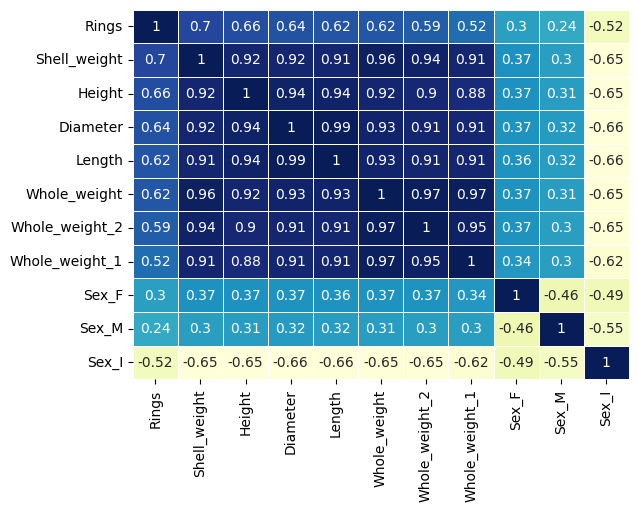

In [322]:
data = data[df.index]
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt=".2g",cmap="YlGnBu",cbar=False)

<Axes: xlabel='Diameter', ylabel='Whole_weight_1'>

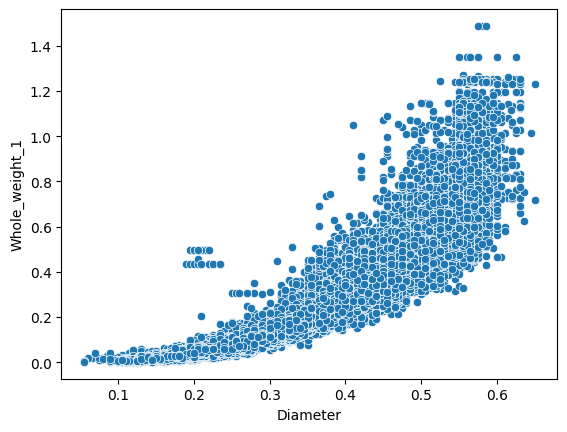

In [323]:
sns.scatterplot(x='Diameter',y='Whole_weight_1',data=data)

In [324]:
whole_mean = data[(data['Diameter'] > 0.18) & (data['Diameter'] < 0.25)]['Whole_weight_1'].mean()
data.loc[(data['Whole_weight_1'] > 0.4) & (data['Diameter'] < 0.25), 'Whole_weight_1'] = whole_mean

In [325]:
# # PCA 
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# data_pca = pca.fit_transform(data.drop("Rings",axis=1))
# data_pca = pd.DataFrame(data_pca)
# data_pca = pd.concat([data_pca,data["Rings"]],axis=1)
# data_pca

In [326]:
data.tail()

,Rings,Shell_weight,Height,Diameter,Length,Whole_weight,Whole_weight_2,Whole_weight_1,Sex_F,Sex_M,Sex_I
151021,NaN,0.0500,0.085000,0.260,0.345,0.1775,0.0265,0.0735,0,0,1
151022,NaN,0.2050,0.145000,0.410,0.525,0.8445,0.1670,0.3885,1,0,0
151023,NaN,0.2650,0.155000,0.440,0.590,1.1220,0.2000,0.3930,0,0,1
151024,NaN,0.4350,0.183586,0.525,0.660,1.4935,0.3575,0.5885,1,0,0
151025,NaN,0.0905,0.120000,0.340,0.430,0.4150,0.0910,0.1525,1,0,0


In [327]:
train = data.drop(data.loc[data["Rings"].isnull()].index)
test = data.loc[data["Rings"].isnull()]
from sklearn.model_selection import train_test_split
x_train,y_train = train.drop("Rings",axis=1),train["Rings"]
x_test= test.drop("Rings",axis=1)
X_train, x_val, Y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [328]:
# data 1 to 90614 is train data & 90615 to 151026 is test data
X_train.shape, x_val.shape, Y_train.shape, y_val.shape, x_test.shape, y_test.shape

((72492, 10), (18123, 10), (72492,), (18123,), (60411, 10), (60411,))

In [329]:
y_test

90615    NaN
90616    NaN
90617    NaN
90618    NaN
90619    NaN
          ..
151021   NaN
151022   NaN
151023   NaN
151024   NaN
151025   NaN
Name: Rings, Length: 60411, dtype: float64

In [330]:
#Applying log transformation to positively skewed features
features_to_transform = ['Rings']
for feature in features_to_transform:
    data[feature] = np.log1p(data[feature])

In [331]:
# xgboost
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_log_error as rmsle
xgb = XGBRegressor(n_jobs=-1,random_state=42,eval_metric="rmsle",learning_rate=0.1, n_estimators=300, max_depth=5)
X,y = train.drop("Rings",axis=1),train["Rings"]
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [332]:
from sklearn.model_selection import KFold
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error

hgbr_params = {
    'max_iter': 1000,
    'max_depth': 15,
    'learning_rate': 0.04,
    'scoring': 'neg_median_absolute_error',  
    'random_state': 42
}

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

hgbr_predictions = np.zeros(len(X))
hgbr_true_labels = np.zeros(len(X))
hgbr_test_predictions = np.zeros(len(x_test))

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    hgbr_model = HistGradientBoostingRegressor(**hgbr_params)
    hgbr_model.fit(X_train, y_train)

    hgbr_fold_preds = hgbr_model.predict(X_val)
    hgbr_fold_test_preds = hgbr_model.predict(x_test)

    hgbr_predictions[val_idx] = hgbr_fold_preds
    hgbr_true_labels[val_idx] = y_val
    hgbr_test_predictions += hgbr_fold_test_preds / n_splits  

overall_metric_hgbr = median_absolute_error(hgbr_true_labels, hgbr_predictions)
print("Overall MedAE (HistGradientBoostingRegressor):", overall_metric_hgbr)

Overall MedAE (HistGradientBoostingRegressor): 0.8550262738239507


In [333]:
submission = pd.DataFrame({"id":test.index,"Rings": hgbr_test_predictions})
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      60411 non-null  int64  
 1   Rings   60411 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 944.1 KB


In [334]:
submission.head()

,id,Rings
0,90615,9.707481
1,90616,9.745383
2,90617,10.227008
3,90618,10.290392
4,90619,7.601181


In [335]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [336]:
submission.to_csv("submission.csv",index=False)